# Exercise 8 - Python: Anomaly Detection and Recommender Systems

<img width="350px" src="https://upload.wikimedia.org/wikipedia/commons/0/07/Two-dimensional_Outliers_Example.png">

## *Part I*: Anomaly Detection

**[Explain section here]**

---

Beginning with package imports and data loading

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio  # Used to load the Octave/MATLAB *.mat files
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

In [10]:
data = sio.loadmat('ex8/ex8data1.mat')

X = data['X']
Xval = data['Xval']
yval = data['yval']

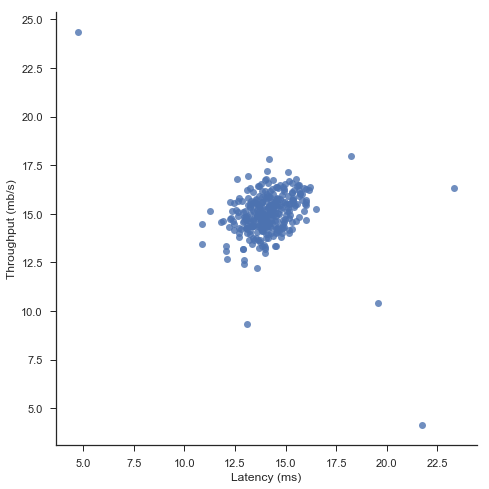

In [27]:
df = pd.DataFrame(X, columns=['Latency (ms)', 'Throughput (mb/s)'])

sns.lmplot(x='Latency (ms)', y='Throughput (mb/s)', data=df,
           fit_reg=False, size=7);

### Gaussian Distribution

Before performing anomaly detecting, we need to fit a model to the data's distribution.

Estimate the Gaussian distribution for each of the features $x_i$.  For each feature $i=1 \dots n$, find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, \dots, x_i^{(m)}\}$ (the $i$-th dimension of each example)

The Gaussian distribution is given by
$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e ^ {-\frac{(x - \mu)^2}{2 \sigma^2}}
\\
\mu: \text{Mean}
\\
\sigma^2: \text{Controls the variance}$$

### Estimating Gaussian parameters

In order to estimate the parameters $(\mu_i, \sigma_i^2)$, of the $i$-th feature, we will use the following equations for the mean and variance:

$$\text{Mean: } \mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}
\\
\text{Variance: } \sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [38]:
def estimate_gaussian(X):
    """
    Takes the matrix X as an input and outputs:
    
    mu: n-dimension vector that holds the mean of all the n features
    sigma2: n-dimension vector that holds the variance of all features
    """
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    
    return mu, sigma2


mu, sigma2 = estimate_gaussian(X)

print('Mean:\n', mu,
      '\nVariance:\n', sigma2)

Mean:
 [ 14.11222578  14.99771051] 
Variance:
 [ 1.83263141  1.70974533]


In [41]:
# ?plt.contour
# plt.contour(mu, sigma2)

### Selecting the threshold $\epsilon$

With the Gaussian parameters, we can see which points are more or less likely to be outliers according to their probabilities in the distribution.  We can determine the threshold for outliers with the cross validation set.

We'll do this by optimizing the $F_1$ score on the cross validation set.  As a reminder, the $F_1$ score is a mix of precision and recall:

$$F_1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$$

and precision and recall are calculated as follows:

$$precision = \frac{True Positive}{True Positive + False Positive}
\\
recall = \frac{True Positive}{True Positive + False Negative}$$

### High dimensional dataset

---

## *Part II*: Recommender Systems

**[Explain section here]**

### Moving ratings dataset

**[Insert joke about Movielens]**

### Collaborative Filtering

#### Collaborative Filtering Cost Function

#### Collaborative Filtering Gradient

#### Regularized Cost Function

#### Regularized Gradient

### Learning Movie Recommendations